In [1]:
import gym
import network
import os
import torch
import config as C
import numpy as np

In [2]:
env = gym.make('Pendulum-v0')

observation_space_size = env.observation_space.shape[0]
action_space_size = env.action_space.shape[0]

In [3]:
cwd = os.getcwd()
parameter_file = 'pendulum_nn_trained_model.pt'
cwd = os.path.join(cwd,parameter_file)

device = torch.device('cpu')
model = network.Agent(observation_space_size=observation_space_size,
                           action_space_size=action_space_size,
                           hidden_size=C.hidden_size)
model.load_state_dict(torch.load(cwd, map_location=device))

<All keys matched successfully>

In [4]:
model.parameters

<bound method Module.parameters of Agent(
  (net): Sequential(
    (0): Linear(in_features=3, out_features=128, bias=True)
    (1): PReLU(num_parameters=1)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): PReLU(num_parameters=1)
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): PReLU(num_parameters=1)
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)>

In [5]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
params

33668

In [6]:
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp
get_n_params(model)

33668

In [7]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
pytorch_total_params

33668

In [8]:
device = 'cpu'
rewards = []

state = env.reset()

while True:
    env.render()
    
    action = model(torch.tensor(state).float().unsqueeze(dim=0).to(device))
    
    #print('action is',action.cpu().item())
    
    # take the chosen action, observe the reward and the next state
    state, reward, done, _ = env.step(action=[action.cpu().item()])
    
    rewards.append(reward)
    
    if done:
        break
        
env.close()

In [9]:
np.sum(rewards)

-121.74543284183804

In [10]:
goal = []

for _ in range(0,100):
    
    rewards = []
    
    
    state = env.reset()
    while True:
        #env.render()

        action = model(torch.tensor(state).float().unsqueeze(dim=0).to(device))

        #print('action is',action.cpu().item())

        # take the chosen action, observe the reward and the next state
        state, reward, done, _ = env.step(action=[action.cpu().item()])

        rewards.append(reward)

        if done:
            break
    
    goal.append(np.sum(rewards))

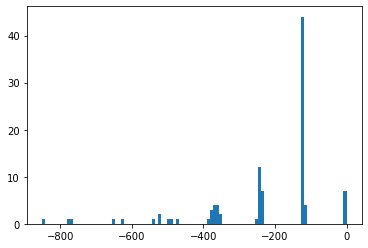

In [11]:
import matplotlib.pyplot as plt
plt.hist(goal,bins = 100)
plt.show()

In [12]:
np.mean(goal)

-225.85401539055482

In [13]:
np.std(goal)

172.2892677915039